In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from PIL import Image

In [33]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

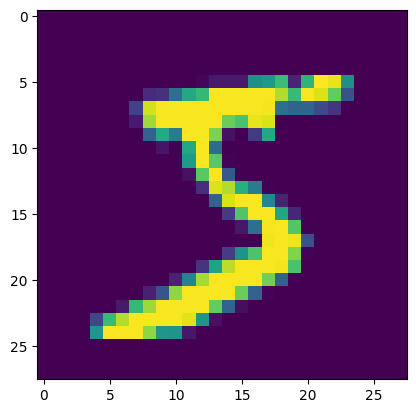

In [7]:
plt.imshow(x_train[0])

In [12]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)


In [17]:
x_train.shape , x_train.shape

((60000, 784), (60000, 784))

In [23]:
from sklearn.preprocessing import MinMaxScaler

ss = MinMaxScaler()

x1_train = ss.fit_transform(x_train)
x1_test = ss.fit_transform(x_test)


In [24]:
x1_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
x1_train = x1_train.reshape(-1,28,28,1)
x1_test = x1_test.reshape(-1,28,28,1)
x1_train.shape , x1_train.shape


((60000, 28, 28, 1), (60000, 28, 28, 1))

In [35]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=10)

In [46]:
import pandas as pd
df = pd.DataFrame(y_train)
df

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
59996,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [47]:
batch_size = 32
epochs = 10

model.fit(x1_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9041 - loss: 0.3100 - val_accuracy: 0.9822 - val_loss: 7.2086
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9858 - loss: 0.0450 - val_accuracy: 0.9849 - val_loss: 8.1732
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9913 - loss: 0.0270 - val_accuracy: 0.9887 - val_loss: 5.9736
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9928 - loss: 0.0207 - val_accuracy: 0.9889 - val_loss: 7.0215
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9956 - loss: 0.0133 - val_accuracy: 0.9861 - val_loss: 9.5393
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9963 - loss: 0.0108 - val_accuracy: 0.9889 - val_loss: 9.2938
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9976 - loss: 0.0077 - val_accuracy: 0.9826 - val_loss: 14.1986
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9972 - l

In [56]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Calculate precision, recall, and F1-score
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
# print(y_pred_probs)
print(y_pred_classes)

from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test.argmax(axis=1), y_pred_classes,average=None)
recall = recall_score(y_test.argmax(axis=1), y_pred_classes,average=None)
f1 = f1_score(y_test.argmax(axis=1), y_pred_classes,average=None)

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 16.9566
Test accuracy: 0.9890999794006348
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[7 2 1 ... 4 5 6]
Precision: [0.99897541 0.99911032 0.9893617  0.98231827 0.98982706 0.99312715
 0.99060543 0.98461538 0.97097097 0.9919598 ]
Recall: [0.99489796 0.98942731 0.99127907 0.99009901 0.99083503 0.97197309
 0.99060543 0.99610895 0.99589322 0.97819623]
F1-score: [0.99693252 0.99424524 0.99031946 0.98619329 0.99033079 0.98243626
 0.99060543 0.99032882 0.9832742  0.98502994]


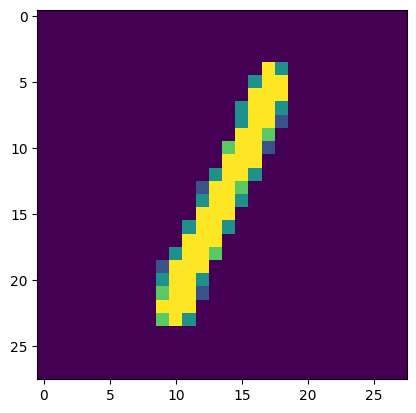

In [59]:
plt.imshow(x_test[6969])

In [60]:
x_test[6969]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 255, 128,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 128, 255, 255,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [67]:
model.predict(x_test[6969].reshape(1,28,28)).argmax()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


1

In [68]:
model.save('hdr.h5')

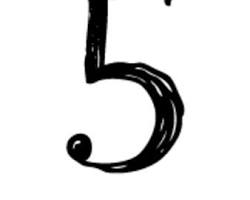

In [71]:
Image.open(image_path)

In [69]:
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

model = load_model('hdr.h5')  

image_path = "image.png"
new_image = Image.open(image_path).convert("L") 

new_image = new_image.resize((28, 28))

new_image = np.array(new_image) / 255.0

new_image = new_image.reshape(1, 28, 28, 1)

predictions = model.predict(new_image)
predicted_digit = np.argmax(predictions, axis=1)[0]

print("Predicted digit:", predicted_digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Predicted digit: 5
